# Personalized Medical Recomendation System with machine learning

# Load datasets and tools.

In [46]:
import pandas as pd

In [47]:
df = pd.read_csv("../datasets/Training.csv")

In [48]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [49]:
df.shape

(4920, 133)

In [50]:
df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

## Check for missing values

Missing Values in Dataset:
 Series([], dtype: int64)


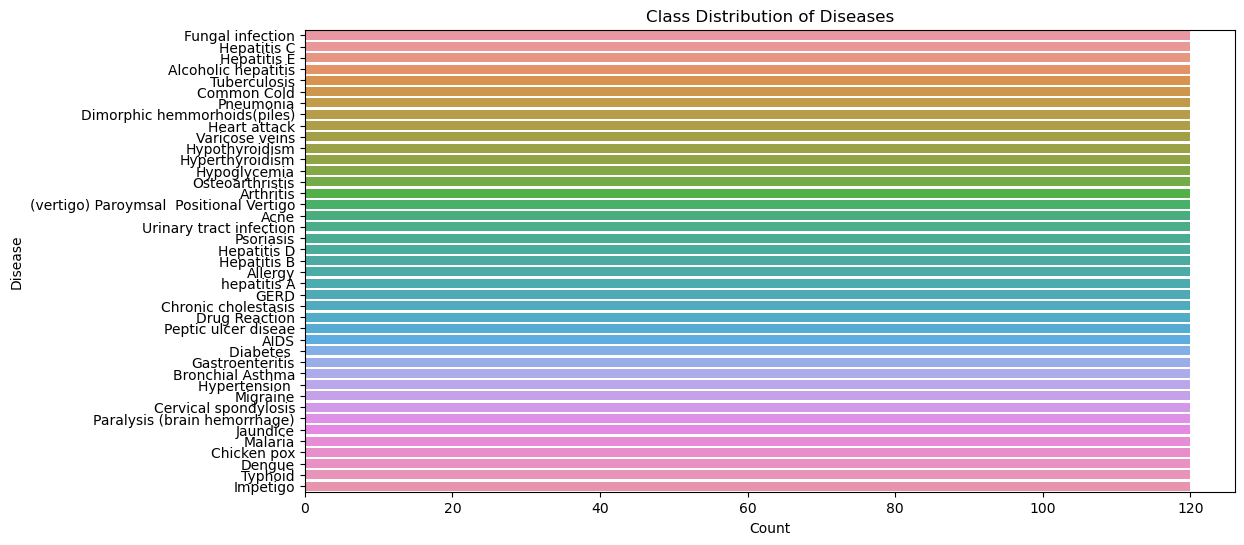


Class Distribution:
 prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                 

In [51]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Dataset:\n", missing_values[missing_values > 0])

# Check class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(y=df['prognosis'], order=df['prognosis'].value_counts().index)
plt.title("Class Distribution of Diseases")
plt.xlabel("Count")
plt.ylabel("Disease")
plt.show()

# Display class counts
class_counts = df['prognosis'].value_counts()
print("\nClass Distribution:\n", class_counts)


# Train, test and split

In [52]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# 1️⃣ Encode the target variable (prognosis)
label_encoder = LabelEncoder()
df['prognosis'] = label_encoder.fit_transform(df['prognosis'])  # Convert disease names to numbers

# 2️⃣ Separate features and target
X = df.drop(columns=['prognosis'])  # Features (Symptoms)
y = df['prognosis']  # Target (Diseases)

# 3️⃣ Scale the features using MinMaxScaler (for SVM)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 4️⃣ Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Display shape of data
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training set size: (3936, 132), Testing set size: (984, 132)


In [53]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

In [54]:
# x = df.drop("prognosis", axis=1)
# y = df['prognosis']

In [55]:
# le = LabelEncoder()
# le.fit(y)
# y = le.transform(y)

In [56]:
# x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.3,random_state=20)

In [57]:
# x_train.shape,x_test.shape,y_train.shape,y_test.shape

## Training top models

In [60]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score,confusion_matrix
import numpy as np

# create a dictionary to store models
models = {
    "SVC":SVC(kernel='linear'),
    "RandomForest": RandomForestClassifier(n_estimators=100,random_state=42),
    "KNeigbors":KNeighborsClassifier(n_neighbors=5),
    "MultinomialNB":MultinomialNB()
}
for model_name, model in models.items():
    # train model
    model.fit(X_train,y_train)
    
    # test model
    predictions = model.predict(X_test)
    
    # calculate accuracy
    accuracy = accuracy_score(y_test,predictions)
    
    # calculate transfusion matrix
    cm = confusion_matrix(y_test,predictions)
    
    print(f"{model_name} accuracy : {accuracy}")
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm,separator=', '))

SVC accuracy : 1.0
SVC Confusion Matrix:
[[24,  0,  0, ...,  0,  0,  0],
 [ 0, 24,  0, ...,  0,  0,  0],
 [ 0,  0, 24, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 24,  0,  0],
 [ 0,  0,  0, ...,  0, 24,  0],
 [ 0,  0,  0, ...,  0,  0, 24]]
RandomForest accuracy : 1.0
RandomForest Confusion Matrix:
[[24,  0,  0, ...,  0,  0,  0],
 [ 0, 24,  0, ...,  0,  0,  0],
 [ 0,  0, 24, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 24,  0,  0],
 [ 0,  0,  0, ...,  0, 24,  0],
 [ 0,  0,  0, ...,  0,  0, 24]]
KNeigbors accuracy : 1.0
KNeigbors Confusion Matrix:
[[24,  0,  0, ...,  0,  0,  0],
 [ 0, 24,  0, ...,  0,  0,  0],
 [ 0,  0, 24, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 24,  0,  0],
 [ 0,  0,  0, ...,  0, 24,  0],
 [ 0,  0,  0, ...,  0,  0, 24]]
MultinomialNB accuracy : 1.0
MultinomialNB Confusion Matrix:
[[24,  0,  0, ...,  0,  0,  0],
 [ 0, 24,  0, ...,  0,  0,  0],
 [ 0,  0, 24, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 24,  0,  0],
 [ 0,  0,  0, ...,  0, 24,  0],
 [ 0,  0,  0, ...,  0,  0,

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1️⃣ Initialize SVC model
svc_model = SVC(kernel='linear', C=1.0, probability=True, random_state=42)

# 2️⃣ Train the model
print("Training SVC model...")
svc_model.fit(X_train, y_train)

# 3️⃣ Make predictions on test data
y_pred = svc_model.predict(X_test)

# 4️⃣ Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"\nSVC Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Training SVC model...

SVC Accuracy: 1.0000

Confusion Matrix:
 [[24  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 24]]

Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                         

## Overfitting: Hyperparameter tuning

In [62]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for SVC
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Perform Grid Search
grid_search = GridSearchCV(SVC(kernel='linear', probability=True), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters
print(f"Best C parameter: {grid_search.best_params_}")

# Train model with best parameters
svc_model = SVC(kernel='linear', C=grid_search.best_params_['C'], probability=True)
svc_model.fit(X_train, y_train)

# Evaluate model again
y_pred = svc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nSVC Accuracy After Tuning: {accuracy:.4f}")


Best C parameter: {'C': 0.01}

SVC Accuracy After Tuning: 1.0000


## Cross-validation

In [63]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svc_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


Cross-Validation Accuracy: 1.0000 (+/- 0.0000)


## Feature selection

In [64]:
from sklearn.feature_selection import SelectFromModel

# Select important features based on feature importance
selector = SelectFromModel(svc_model, threshold='median', prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

print(f"Reduced feature set shape: {X_train_selected.shape}")

# Retrain with reduced features
svc_model.fit(X_train_selected, y_train)
y_pred = svc_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nSVC Accuracy After Feature Selection: {accuracy:.4f}")


Reduced feature set shape: (3936, 66)

SVC Accuracy After Feature Selection: 0.9949


## Artificial Data Augmentation (Noise)

In [65]:
import random

# Make a copy of labels
y_train_noisy = y_train.copy()

# Introduce 2% noise (randomly shuffle some labels)
num_samples = int(len(y_train) * 0.02)  # 2% of dataset
random_indices = random.sample(range(len(y_train)), num_samples)

for idx in random_indices:
    y_train_noisy.iloc[idx] = random.choice(y_train.unique())  # Assign a random disease

# Train model again with noisy labels
svc_noisy = SVC(kernel='linear', C=0.01, probability=True)
svc_noisy.fit(X_train, y_train_noisy)

# Evaluate again
y_pred_noisy = svc_noisy.predict(X_test)
accuracy_noisy = accuracy_score(y_test, y_pred_noisy)
print(f"\nSVC Accuracy After Label Noise: {accuracy_noisy:.4f}")



SVC Accuracy After Label Noise: 1.0000


In [66]:
svc_rbf = SVC(kernel='rbf', C=0.01, gamma='scale', probability=True)
svc_rbf.fit(X_train, y_train)

y_pred_rbf = svc_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"\nSVC (RBF Kernel) Accuracy: {accuracy_rbf:.4f}")



SVC (RBF Kernel) Accuracy: 1.0000


## Logistic regression

In [67]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500, C=0.01)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"\nLogistic Regression Accuracy: {accuracy_log:.4f}")



Logistic Regression Accuracy: 1.0000


## Fixing perfection of dataset

In [68]:
import numpy as np
import pandas as pd

def introduce_symptom_variability(df, drop_prob=0.1):
    """Randomly drops some symptoms to create more diverse cases."""
    df_noisy = df.copy()
    for col in df.columns[:-1]:  # Exclude the target column
        mask = np.random.rand(len(df)) < drop_prob
        df_noisy.loc[mask, col] = 0  # Remove some symptoms at random
    return df_noisy

# Convert NumPy arrays to DataFrames with column names
symptom_columns = df.columns.drop('prognosis')
X_train_df = pd.DataFrame(X_train, columns=symptom_columns)  
X_test_df = pd.DataFrame(X_test, columns=symptom_columns)  

# Apply the function
X_train_noisy = introduce_symptom_variability(X_train_df, drop_prob=0.1)
X_test_noisy = introduce_symptom_variability(X_test_df, drop_prob=0.1)

# Convert back to NumPy arrays for model training
X_train_noisy = X_train_noisy.to_numpy()
X_test_noisy = X_test_noisy.to_numpy()

# Retrain with modified data
svc = SVC(kernel='linear', C=0.01)
svc.fit(X_train_noisy, y_train)

# Reevaluate accuracy
y_pred_noisy = svc.predict(X_test_noisy)
accuracy_noisy = accuracy_score(y_test, y_pred_noisy)
print(f"\nSVC Accuracy After Symptom Variability: {accuracy_noisy:.4f}")



SVC Accuracy After Symptom Variability: 0.9970


## Saving the model

In [69]:
import pickle

# Define model file path
model_filename = "svc1.pkl"

# Save the trained model
with open(model_filename, 'wb') as model_file:
    pickle.dump(svc, model_file)

print(f"✅ Model saved successfully as {model_filename}")


✅ Model saved successfully as svc1.pkl


## Load model for testing

In [70]:
# Load the saved model
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

print("✅ Model loaded successfully!")

# Test prediction
# Test prediction with the loaded model
sample_input = X_test[0].reshape(1, -1)  # Pick a sample from test data
predicted_disease = loaded_model.predict(sample_input)[0]
print(f"🔍 Predicted Disease: {predicted_disease}")



✅ Model loaded successfully!
🔍 Predicted Disease: 23


## Single prediction

In [71]:
# svc = SVC(kernel='linear')
# svc .fit(x_train,y_train)
# ypred = svc.predict(x_test)
# accuracy_score(y_test,ypred)

In [75]:
# Make a single prediction
print("Predicted label :", svc.predict(X_test[0].reshape(1, -1)))

# Print the actual label
print("Actual Label :", y_test[0])  # Use index 0 to get the first label


Predicted label : [23]
Actual Label : 15


In [78]:
# test 1
class_labels = svc.classes_

# Get the predicted label
predicted_label = svc.predict(X_test[0].reshape(1, -1))[0]

# Find the index of the predicted label
predicted_index = list(class_labels).index(predicted_label)

# Get the actual label index
actual_index = y_test[0]

print("Predicted Label:", [predicted_index])
print("Actual Label:", actual_index)



Predicted Label: [23]
Actual Label: 15


In [79]:
# test2 
print("Predicted label :", svc.predict(X_test[10].reshape(1, -1)))
print("Actual Label :", y_test[10])

Predicted label : [14]


KeyError: 10

## Recomendation system and prediction
### loading database & use logic for recommendations

In [80]:
sym_des = pd.read_csv('../datasets/symtoms_df.csv')
precautions = pd.read_csv('../datasets/precautions_df.csv')
workout = pd.read_csv("../datasets/workout_df.csv")
description = pd.read_csv("../datasets/description.csv")
medications = pd.read_csv("../datasets/medications.csv")
diets = pd.read_csv("../datasets/diets.csv")

In [81]:
#============================================================
# custome and helping functions
#==========================helper funtions================
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]


In [82]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1
    
print("=================medications==================")
i = 1
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
i = 1
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
i = 1
for d_i in die:
    print(i, ": ", d_i)
    i += 1

Enter your symptoms.......shivering, joint_pain,sweating,headache,dizziness,mild_fever
=================predicted disease============
Hypertension 
=================description==================

=================precautions==================
1 :  meditation
2 :  salt baths
3 :  reduce stress
4 :  get proper sleep
=================medications==================
=================workout==================
=================diets==================
